In [0]:
#from google.colab import files
#uploaded = files.upload() 
#Please select file location

#**Data** **Preprocessing**

In [2]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,auc, roc_auc_score, roc_curve,confusion_matrix,classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
#change the dataset location
df = pd.read_csv('bank-full.csv')
df.shape

(45211, 17)

In [5]:
#viewing data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#data info
df.info()
#No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Removing non-relevant variables
df1=df.drop(columns=['day','month','contact','poutcome'],axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,no


In [8]:
#Replacing all the binary variables to 0 and 1
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,508,4,-1,0,0


In [9]:
#creating Dummies for categorical variables
df2 = pd.get_dummies(df1)
df2.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [10]:
#Removing extra dummy variables & checking descriptive stats
df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


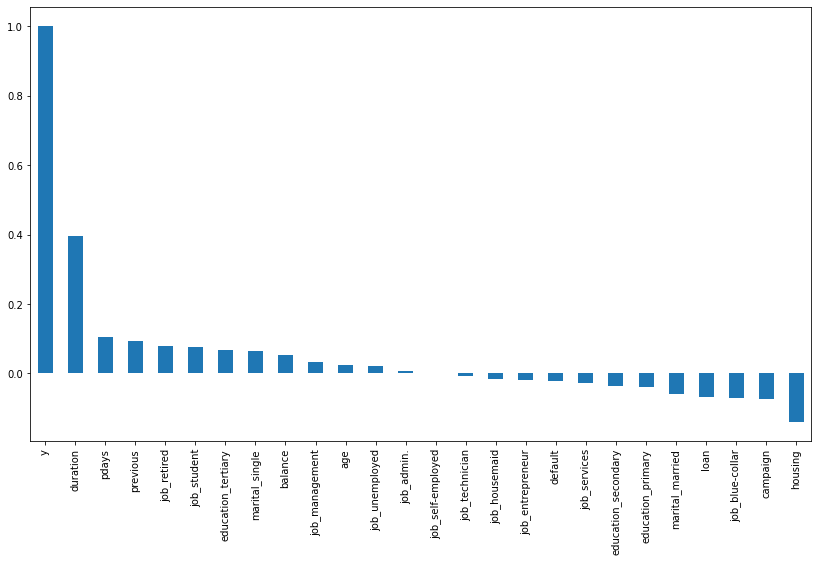

In [11]:
#Correlation plot
plt.figure(figsize=(14,8))
df3.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [0]:
#Creating binary classification target variable
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)

In [0]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#Define Functions

In [0]:
# Making the Confusion Matrix
def confusionmat(y,y_hat):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_hat)
  accu=accuracy_score(y,y_hat)
  print(cm,"\n")
  print("The accuracy is",accu)

In [0]:
#Accuracy and Loss Curves
def learningcurve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [0]:
  # Applying k-Fold Cross Validation
  from sklearn.model_selection import cross_val_score
  def kfold(x1,y1):
    return cross_val_score(estimator = classifier, X = x1, y = y1, cv = 10)

In [0]:
from sklearn.model_selection import learning_curve
def knn_learningcurve(c, df_features, df_target):
  train_sizes, train_scores, test_scores = learning_curve(c, df_features, df_target,cv=10,n_jobs=-1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure()
  plt.title("KNNClassifier")
  plt.legend(loc="best")
  plt.xlabel("Training examples")
  plt.ylabel("Score")

  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

  plt.legend(loc="best")
  # sizes the window for readability and displays the plot
  # shows error from 0 to 1.1
  plt.ylim(-.1,1.1)
  plt.show

In [0]:
#Roc Curve
def roc_auc(yTest,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#Artificial Neural Network

##Experimenting with Number of Epoch

In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

epoch=[100,250,500]


Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2787 - accuracy: 0.8885 - val_loss: 0.2504 - val_accuracy: 0.8898
Epoch 2/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2544 - accuracy: 0.8911 - val_loss: 0.2499 - val_accuracy: 0.8860
Epoch 3/100
22152/22152 [==============================] - 3s 145us/step - loss: 0.2514 - accuracy: 0.8912 - val_loss: 0.2457 - val_accuracy: 0.8936
Epoch 4/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2489 - accuracy: 0.8943 - val_loss: 0.2441 - val_accuracy: 0.8936
Epoch 5/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2464 - accuracy: 0.8954 - val_loss: 0.2436 - val_accuracy: 0.8952
Epoch 6/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2449 - accuracy: 0.8950 - val_loss: 0.2419 - val_accuracy: 0.8950
Epoch 7/100
22152/22152 [==============================] 

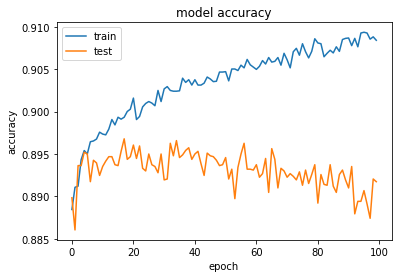

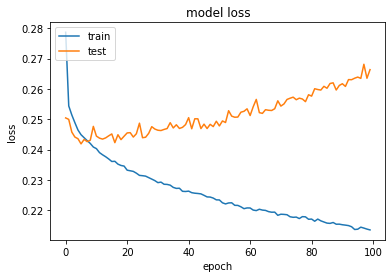

Train on 22152 samples, validate on 9495 samples
Epoch 1/250
22152/22152 [==============================] - 3s 144us/step - loss: 0.2135 - accuracy: 0.9092 - val_loss: 0.2660 - val_accuracy: 0.8912
Epoch 2/250
22152/22152 [==============================] - 3s 143us/step - loss: 0.2134 - accuracy: 0.9093 - val_loss: 0.2646 - val_accuracy: 0.8895
Epoch 3/250
22152/22152 [==============================] - 3s 144us/step - loss: 0.2132 - accuracy: 0.9092 - val_loss: 0.2665 - val_accuracy: 0.8875
Epoch 4/250
22152/22152 [==============================] - 3s 143us/step - loss: 0.2129 - accuracy: 0.9097 - val_loss: 0.2647 - val_accuracy: 0.8889
Epoch 5/250
22152/22152 [==============================] - 3s 144us/step - loss: 0.2123 - accuracy: 0.9088 - val_loss: 0.2655 - val_accuracy: 0.8913
Epoch 6/250
22152/22152 [==============================] - 3s 144us/step - loss: 0.2128 - accuracy: 0.9093 - val_loss: 0.2661 - val_accuracy: 0.8910
Epoch 7/250
22152/22152 [==============================] 

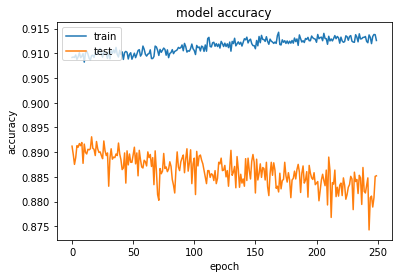

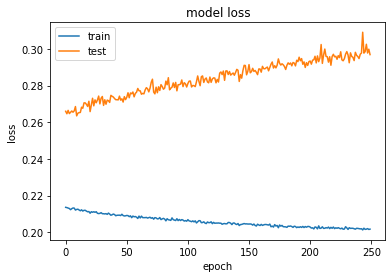

Train on 22152 samples, validate on 9495 samples
Epoch 1/500
22152/22152 [==============================] - 3s 144us/step - loss: 0.2016 - accuracy: 0.9129 - val_loss: 0.2962 - val_accuracy: 0.8866
Epoch 2/500
22152/22152 [==============================] - 3s 143us/step - loss: 0.2016 - accuracy: 0.9126 - val_loss: 0.2962 - val_accuracy: 0.8813
Epoch 3/500
22152/22152 [==============================] - 3s 143us/step - loss: 0.2012 - accuracy: 0.9125 - val_loss: 0.2956 - val_accuracy: 0.8875
Epoch 4/500
22152/22152 [==============================] - 3s 143us/step - loss: 0.2014 - accuracy: 0.9141 - val_loss: 0.2978 - val_accuracy: 0.8796
Epoch 5/500
22152/22152 [==============================] - 3s 145us/step - loss: 0.2017 - accuracy: 0.9125 - val_loss: 0.2976 - val_accuracy: 0.8868
Epoch 6/500
22152/22152 [==============================] - 3s 145us/step - loss: 0.2013 - accuracy: 0.9133 - val_loss: 0.2975 - val_accuracy: 0.8826
Epoch 7/500
22152/22152 [==============================] 

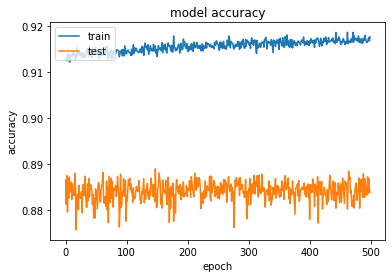

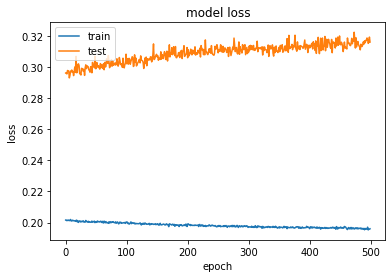

In [27]:
for e in epoch:
  # Fitting the ANN to the Training set
  history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=e,validation_split=0.3)
  # Predicting the Test set results
  y_pred = classifier.predict_classes(x1_test)
  pre_score = sk.average_precision_score(y1_test, y_pred)
  classifier.summary()
  test_results = classifier.evaluate(x1_test, y1_test)
  print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
  print("The model test average precision score is {}.".format(pre_score))
  confusionmat(y1_test,y_pred)
  learningcurve(history)


##Experimenting with Number of Layers

Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 141us/step - loss: 0.3196 - accuracy: 0.8652 - val_loss: 0.2537 - val_accuracy: 0.8918
Epoch 2/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2591 - accuracy: 0.8905 - val_loss: 0.2467 - val_accuracy: 0.8939
Epoch 3/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2541 - accuracy: 0.8919 - val_loss: 0.2457 - val_accuracy: 0.8937
Epoch 4/100
22152/22152 [==============================] - 3s 145us/step - loss: 0.2517 - accuracy: 0.8928 - val_loss: 0.2436 - val_accuracy: 0.8938
Epoch 5/100
22152/22152 [==============================] - 3s 132us/step - loss: 0.2502 - accuracy: 0.8934 - val_loss: 0.2431 - val_accuracy: 0.8947
Epoch 6/100
22152/22152 [==============================] - 3s 131us/step - loss: 0.2488 - accuracy: 0.8928 - val_loss: 0.2429 - val_accuracy: 0.8920
Epoch 7/100
22152/22152 [==============================] 

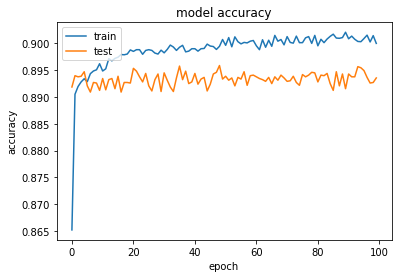

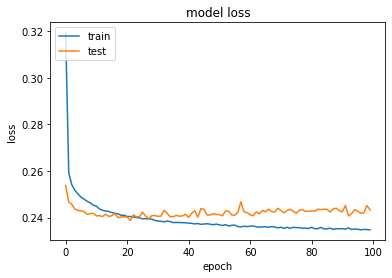

In [30]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 4s 170us/step - loss: 0.2825 - accuracy: 0.8848 - val_loss: 0.2490 - val_accuracy: 0.8910
Epoch 2/100
22152/22152 [==============================] - 3s 154us/step - loss: 0.2565 - accuracy: 0.8915 - val_loss: 0.2461 - val_accuracy: 0.8943
Epoch 3/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2529 - accuracy: 0.8923 - val_loss: 0.2441 - val_accuracy: 0.8947
Epoch 4/100
22152/22152 [==============================] - 3s 148us/step - loss: 0.2500 - accuracy: 0.8942 - val_loss: 0.2416 - val_accuracy: 0.8942
Epoch 5/100
22152/22152 [==============================] - 3s 147us/step - loss: 0.2486 - accuracy: 0.8931 - val_loss: 0.2419 - val_accuracy: 0.8958
Epoch 6/100
22152/22152 [==============================] - 4s 165us/step - loss: 0.2474 - accuracy: 0.8945 - val_loss: 0.2409 - val_accuracy: 0.8938
Epoch 7/100
22152/22152 [==============================] 

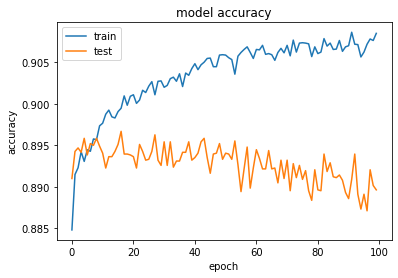

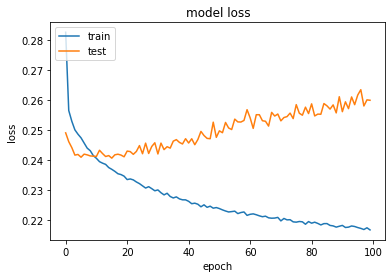

In [31]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 4s 183us/step - loss: 0.2847 - accuracy: 0.8846 - val_loss: 0.2494 - val_accuracy: 0.8944
Epoch 2/100
22152/22152 [==============================] - 4s 176us/step - loss: 0.2541 - accuracy: 0.8902 - val_loss: 0.2494 - val_accuracy: 0.8946
Epoch 3/100
22152/22152 [==============================] - 4s 158us/step - loss: 0.2505 - accuracy: 0.8932 - val_loss: 0.2429 - val_accuracy: 0.8948
Epoch 4/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.2491 - accuracy: 0.8937 - val_loss: 0.2424 - val_accuracy: 0.8952
Epoch 5/100
22152/22152 [==============================] - 3s 155us/step - loss: 0.2473 - accuracy: 0.8932 - val_loss: 0.2429 - val_accuracy: 0.8961
Epoch 6/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.2459 - accuracy: 0.8956 - val_loss: 0.2421 - val_accuracy: 0.8964
Epoch 7/100
22152/22152 [==============================] 

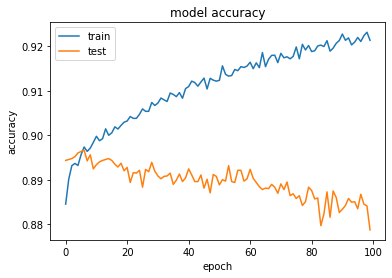

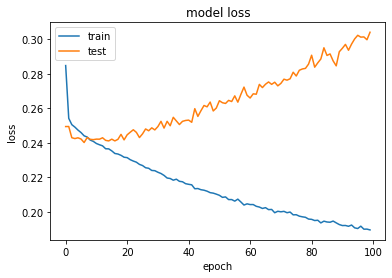

In [32]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the third hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



##Experimenting with Number of Nodes

Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.2817 - accuracy: 0.8870 - val_loss: 0.2512 - val_accuracy: 0.8934
Epoch 2/100
22152/22152 [==============================] - 3s 147us/step - loss: 0.2551 - accuracy: 0.8914 - val_loss: 0.2457 - val_accuracy: 0.8959
Epoch 3/100
22152/22152 [==============================] - 3s 148us/step - loss: 0.2518 - accuracy: 0.8922 - val_loss: 0.2437 - val_accuracy: 0.8983
Epoch 4/100
22152/22152 [==============================] - 3s 148us/step - loss: 0.2499 - accuracy: 0.8927 - val_loss: 0.2443 - val_accuracy: 0.8961
Epoch 5/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2478 - accuracy: 0.8941 - val_loss: 0.2444 - val_accuracy: 0.8966
Epoch 6/100
22152/22152 [==============================] - 3s 148us/step - loss: 0.2470 - accuracy: 0.8954 - val_loss: 0.2425 - val_accuracy: 0.8975
Epoch 7/100
22152/22152 [==============================] 

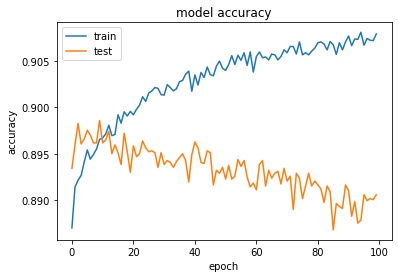

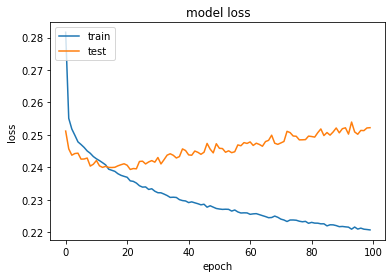

In [33]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.2783 - accuracy: 0.8847 - val_loss: 0.2495 - val_accuracy: 0.8873
Epoch 2/100
22152/22152 [==============================] - 3s 146us/step - loss: 0.2518 - accuracy: 0.8925 - val_loss: 0.2427 - val_accuracy: 0.8947
Epoch 3/100
22152/22152 [==============================] - 3s 145us/step - loss: 0.2486 - accuracy: 0.8937 - val_loss: 0.2405 - val_accuracy: 0.8950
Epoch 4/100
22152/22152 [==============================] - 3s 143us/step - loss: 0.2463 - accuracy: 0.8936 - val_loss: 0.2403 - val_accuracy: 0.8955
Epoch 5/100
22152/22152 [==============================] - 3s 144us/step - loss: 0.2438 - accuracy: 0.8963 - val_loss: 0.2400 - val_accuracy: 0.8965
Epoch 6/100
22152/22152 [==============================] - 3s 143us/step - loss: 0.2423 - accuracy: 0.8962 - val_loss: 0.2377 - val_accuracy: 0.8971
Epoch 7/100
22152/22152 [==============================] 

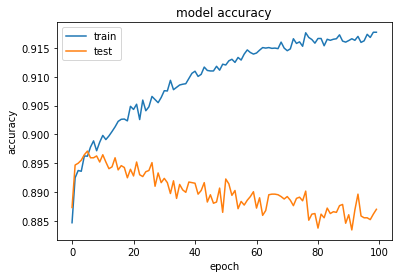

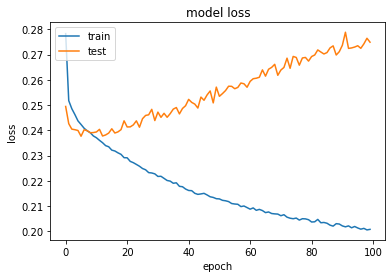

In [34]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.2765 - accuracy: 0.8880 - val_loss: 0.2464 - val_accuracy: 0.8926
Epoch 2/100
22152/22152 [==============================] - 3s 145us/step - loss: 0.2532 - accuracy: 0.8916 - val_loss: 0.2447 - val_accuracy: 0.8927
Epoch 3/100
22152/22152 [==============================] - 3s 145us/step - loss: 0.2500 - accuracy: 0.8948 - val_loss: 0.2417 - val_accuracy: 0.8974
Epoch 4/100
22152/22152 [==============================] - 3s 144us/step - loss: 0.2472 - accuracy: 0.8955 - val_loss: 0.2417 - val_accuracy: 0.8967
Epoch 5/100
22152/22152 [==============================] - 3s 144us/step - loss: 0.2451 - accuracy: 0.8961 - val_loss: 0.2466 - val_accuracy: 0.8954
Epoch 6/100
22152/22152 [==============================] - 3s 144us/step - loss: 0.2439 - accuracy: 0.8948 - val_loss: 0.2407 - val_accuracy: 0.8956
Epoch 7/100
22152/22152 [==============================] 

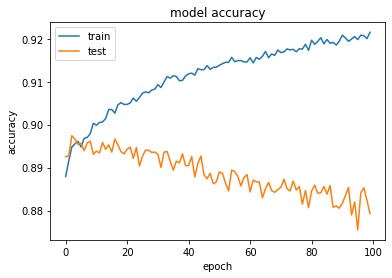

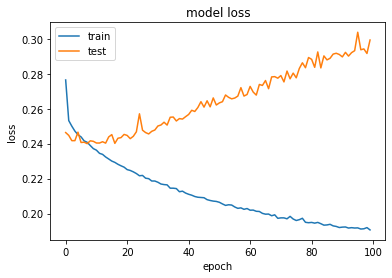

In [36]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the second hidden layer
classifier.add(Dense(32,activation="relu"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



##Experimenting with Activation Function

Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.2843 - accuracy: 0.8849 - val_loss: 0.2488 - val_accuracy: 0.8962
Epoch 2/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2568 - accuracy: 0.8905 - val_loss: 0.2464 - val_accuracy: 0.8952
Epoch 3/100
22152/22152 [==============================] - 3s 147us/step - loss: 0.2519 - accuracy: 0.8917 - val_loss: 0.2456 - val_accuracy: 0.8939
Epoch 4/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2491 - accuracy: 0.8934 - val_loss: 0.2407 - val_accuracy: 0.8944
Epoch 5/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2459 - accuracy: 0.8945 - val_loss: 0.2428 - val_accuracy: 0.8961
Epoch 6/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2444 - accuracy: 0.8959 - val_loss: 0.2382 - val_accuracy: 0.8968
Epoch 7/100
22152/22152 [==============================] 

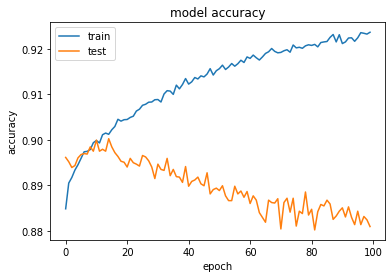

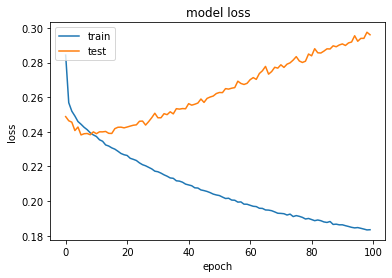

In [39]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="tanh"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="tanh"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 157us/step - loss: 0.2952 - accuracy: 0.8847 - val_loss: 0.2501 - val_accuracy: 0.8945
Epoch 2/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2589 - accuracy: 0.8903 - val_loss: 0.2451 - val_accuracy: 0.8948
Epoch 3/100
22152/22152 [==============================] - 3s 148us/step - loss: 0.2559 - accuracy: 0.8919 - val_loss: 0.2454 - val_accuracy: 0.8951
Epoch 4/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2541 - accuracy: 0.8917 - val_loss: 0.2423 - val_accuracy: 0.8953
Epoch 5/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2525 - accuracy: 0.8938 - val_loss: 0.2436 - val_accuracy: 0.8919
Epoch 6/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.2515 - accuracy: 0.8932 - val_loss: 0.2422 - val_accuracy: 0.8951
Epoch 7/100
22152/22152 [==============================] 

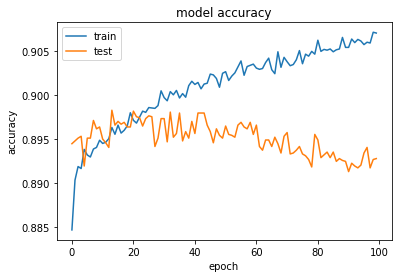

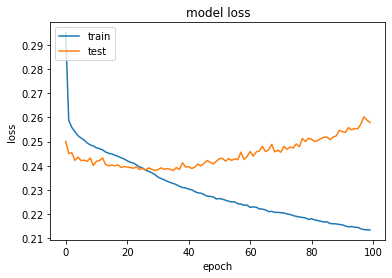

In [38]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="sigmoid"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="sigmoid"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 157us/step - loss: 0.3897 - accuracy: 0.8722 - val_loss: 0.2953 - val_accuracy: 0.8815
Epoch 2/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.2738 - accuracy: 0.8840 - val_loss: 0.2565 - val_accuracy: 0.8815
Epoch 3/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.2590 - accuracy: 0.8840 - val_loss: 0.2513 - val_accuracy: 0.8815
Epoch 4/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.2552 - accuracy: 0.8846 - val_loss: 0.2484 - val_accuracy: 0.8825
Epoch 5/100
22152/22152 [==============================] - 3s 150us/step - loss: 0.2521 - accuracy: 0.8885 - val_loss: 0.2471 - val_accuracy: 0.8919
Epoch 6/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.2497 - accuracy: 0.8913 - val_loss: 0.2451 - val_accuracy: 0.8916
Epoch 7/100
22152/22152 [==============================] 

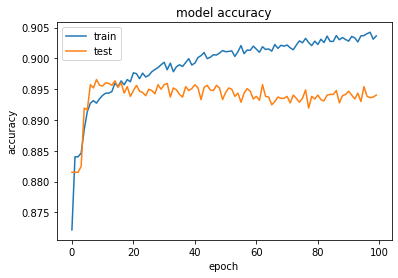

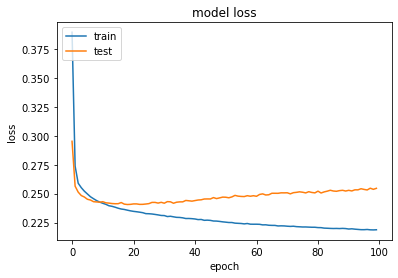

In [37]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)



#Final ANN

In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(e,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

#K-Nearest Neighbor

##Experiment with Number of Neighbors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

[[11046   923]
 [ 1025   570]] 

The accuracy is 0.8563845473311708
KNN with n=  1
The Confusion Matrix
 [[11046   923]
 [ 1025   570]]
The Classification report
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     11969
           1       0.38      0.36      0.37      1595

    accuracy                           0.86     13564
   macro avg       0.65      0.64      0.64     13564
weighted avg       0.85      0.86      0.85     13564

The Accuracy score with only 1 Training and Testing Data Set
 85.63845473311707
The mean of the accuracy scores with using 10 fold-cross validation
 85.74276367427399
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6279321972328044


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11704   265]
 [ 1358   237]] 

The accuracy is 0.8803450309643173
KNN with n=  2
The Confusion Matrix
 [[11704   265]
 [ 1358   237]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.47      0.15      0.23      1595

    accuracy                           0.88     13564
   macro avg       0.68      0.56      0.58     13564
weighted avg       0.85      0.88      0.85     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.03450309643172
The mean of the accuracy scores with using 10 fold-cross validation
 88.57713654601629
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3630308135917443


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11426   543]
 [ 1120   475]] 

The accuracy is 0.8773960483633146
KNN with n=  3
The Confusion Matrix
 [[11426   543]
 [ 1120   475]]
The Classification report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     11969
           1       0.47      0.30      0.36      1595

    accuracy                           0.88     13564
   macro avg       0.69      0.63      0.65     13564
weighted avg       0.86      0.88      0.87     13564

The Accuracy score with only 1 Training and Testing Data Set
 87.73960483633147
The mean of the accuracy scores with using 10 fold-cross validation
 88.01469433975831
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.524060292125527


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11703   266]
 [ 1321   274]] 

The accuracy is 0.8829991153052197
KNN with n=  4
The Confusion Matrix
 [[11703   266]
 [ 1321   274]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.51      0.17      0.26      1595

    accuracy                           0.88     13564
   macro avg       0.70      0.57      0.60     13564
weighted avg       0.85      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.29991153052197
The mean of the accuracy scores with using 10 fold-cross validation
 88.71616407331292
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4457262711347953


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11543   426]
 [ 1184   411]] 

The accuracy is 0.8813034503096432
KNN with n=  5
The Confusion Matrix
 [[11543   426]
 [ 1184   411]]
The Classification report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     11969
           1       0.49      0.26      0.34      1595

    accuracy                           0.88     13564
   macro avg       0.70      0.61      0.64     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.13034503096432
The mean of the accuracy scores with using 10 fold-cross validation
 88.71932263237888
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4400410022055599


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11707   262]
 [ 1324   271]] 

The accuracy is 0.8830728398702448
KNN with n=  6
The Confusion Matrix
 [[11707   262]
 [ 1324   271]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.51      0.17      0.25      1595

    accuracy                           0.88     13564
   macro avg       0.70      0.57      0.60     13564
weighted avg       0.85      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.30728398702448
The mean of the accuracy scores with using 10 fold-cross validation
 88.91207961605983
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4993136232405453


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11592   377]
 [ 1208   387]] 

The accuracy is 0.8831465644352698
KNN with n=  7
The Confusion Matrix
 [[11592   377]
 [ 1208   387]]
The Classification report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11969
           1       0.51      0.24      0.33      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.61      0.63     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.31465644352699
The mean of the accuracy scores with using 10 fold-cross validation
 88.82675857744012
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4217675261924832


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11734   235]
 [ 1326   269]] 

The accuracy is 0.8849159539958714
KNN with n=  8
The Confusion Matrix
 [[11734   235]
 [ 1326   269]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.53      0.17      0.26      1595

    accuracy                           0.88     13564
   macro avg       0.72      0.57      0.60     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.49159539958714
The mean of the accuracy scores with using 10 fold-cross validation
 88.92155729044961
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.42238597015193746


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11640   329]
 [ 1229   366]] 

The accuracy is 0.8851371276909467
KNN with n=  9
The Confusion Matrix
 [[11640   329]
 [ 1229   366]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11969
           1       0.53      0.23      0.32      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.51371276909467
The mean of the accuracy scores with using 10 fold-cross validation
 88.96579409350451
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3977334212633169


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11740   229]
 [ 1341   254]] 

The accuracy is 0.8842524329106458
KNN with n=  10
The Confusion Matrix
 [[11740   229]
 [ 1341   254]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.53      0.16      0.24      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.57      0.59     13564
weighted avg       0.85      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.42524329106458
The mean of the accuracy scores with using 10 fold-cross validation
 88.93737105629486
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4389960760484567


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11681   288]
 [ 1275   320]] 

The accuracy is 0.8847685048658213
KNN with n=  11
The Confusion Matrix
 [[11681   288]
 [ 1275   320]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.53      0.20      0.29      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.59      0.61     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.47685048658212
The mean of the accuracy scores with using 10 fold-cross validation
 88.95632340928653
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.40306792698528776


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11755   214]
 [ 1339   256]] 

The accuracy is 0.8855057505160719
KNN with n=  12
The Confusion Matrix
 [[11755   214]
 [ 1339   256]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.16      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.5505750516072
The mean of the accuracy scores with using 10 fold-cross validation
 88.98477540577947
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4804742901178261


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11693   276]
 [ 1288   307]] 

The accuracy is 0.8846947803007962
KNN with n=  13
The Confusion Matrix
 [[11693   276]
 [ 1288   307]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.53      0.19      0.28      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.58      0.61     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.46947803007961
The mean of the accuracy scores with using 10 fold-cross validation
 89.00687832906934
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4258265826373963


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11764   205]
 [ 1343   252]] 

The accuracy is 0.8858743733411973
KNN with n=  14
The Confusion Matrix
 [[11764   205]
 [ 1343   252]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.16      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58743733411973
The mean of the accuracy scores with using 10 fold-cross validation
 88.91840871734342
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3781112995665947


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11714   255]
 [ 1293   302]] 

The accuracy is 0.8858743733411973
KNN with n=  15
The Confusion Matrix
 [[11714   255]
 [ 1293   302]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.19      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58743733411973
The mean of the accuracy scores with using 10 fold-cross validation
 88.96264152601444
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4003423047685184


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11767   202]
 [ 1344   251]] 

The accuracy is 0.8860218224712474
KNN with n=  16
The Confusion Matrix
 [[11767   202]
 [ 1344   251]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.16      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.60218224712474
The mean of the accuracy scores with using 10 fold-cross validation
 88.97529673279368
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4568726599890289


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11725   244]
 [ 1312   283]] 

The accuracy is 0.8852845768209967
KNN with n=  17
The Confusion Matrix
 [[11725   244]
 [ 1312   283]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.18      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.52845768209967
The mean of the accuracy scores with using 10 fold-cross validation
 88.99108453514357
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4462674923658389


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11777   192]
 [ 1361   234]] 

The accuracy is 0.8855057505160719
KNN with n=  18
The Confusion Matrix
 [[11777   192]
 [ 1361   234]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.15      0.23      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.58     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.5505750516072
The mean of the accuracy scores with using 10 fold-cross validation
 88.94052462238096
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.36886354524439213


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11736   233]
 [ 1333   262]] 

The accuracy is 0.8845473311707461
KNN with n=  19
The Confusion Matrix
 [[11736   233]
 [ 1333   262]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.53      0.16      0.25      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.57      0.59     13564
weighted avg       0.85      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.45473311707461
The mean of the accuracy scores with using 10 fold-cross validation
 89.01320143877707
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.41595587399657874


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11789   180]
 [ 1370   225]] 

The accuracy is 0.8857269242111472
KNN with n=  20
The Confusion Matrix
 [[11789   180]
 [ 1370   225]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.14      0.22      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.57269242111472
The mean of the accuracy scores with using 10 fold-cross validation
 88.94368018565896
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3335857038150159


No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d a

[[11751   218]
 [ 1332   263]] 

The accuracy is 0.8857269242111472
KNN with n=  21
The Confusion Matrix
 [[11751   218]
 [ 1332   263]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.16      0.25      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.57269242111472
The mean of the accuracy scores with using 10 fold-cross validation
 89.05111812791216
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3874598992453356


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWa

[[11797   172]
 [ 1378   217]] 

The accuracy is 0.8857269242111472
KNN with n=  22
The Confusion Matrix
 [[11797   172]
 [ 1378   217]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.56      0.14      0.22      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.58     13564
weighted avg       0.86      0.89      0.85     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.57269242111472
The mean of the accuracy scores with using 10 fold-cross validation
 88.92472084249545
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.35187539483062413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWa

[[11767   202]
 [ 1354   241]] 

The accuracy is 0.8852845768209967
KNN with n=  23
The Confusion Matrix
 [[11767   202]
 [ 1354   241]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.15      0.24      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.52845768209967
The mean of the accuracy scores with using 10 fold-cross validation
 89.00055821514948
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.37393446568244887


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWa

[[11811   158]
 [ 1390   205]] 

The accuracy is 0.8858743733411973
KNN with n=  24
The Confusion Matrix
 [[11811   158]
 [ 1390   205]]
The Classification report
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     11969
           1       0.56      0.13      0.21      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58743733411973
The mean of the accuracy scores with using 10 fold-cross validation
 88.91840971593939
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.39590162111852845


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWa

[[11779   190]
 [ 1358   237]] 

The accuracy is 0.8858743733411973
KNN with n=  25
The Confusion Matrix
 [[11779   190]
 [ 1358   237]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.15      0.23      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58743733411973
The mean of the accuracy scores with using 10 fold-cross validation
 89.01636199503497
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.34971219479384996


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
No handles with labels found to put in legend.


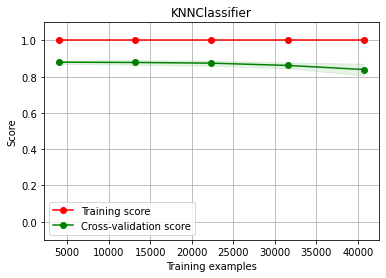

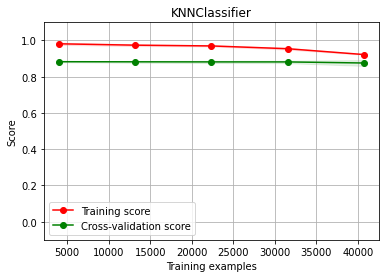

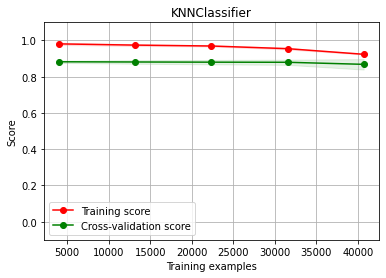

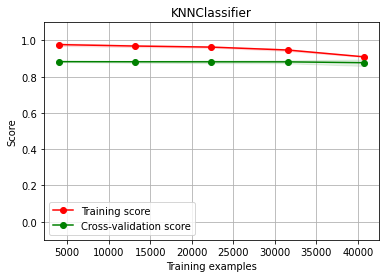

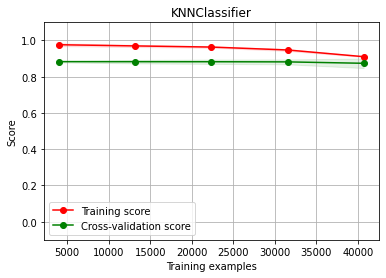

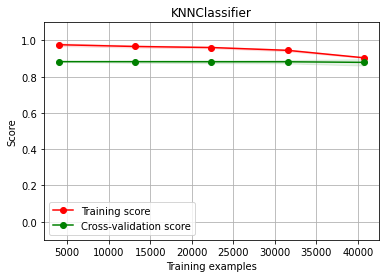

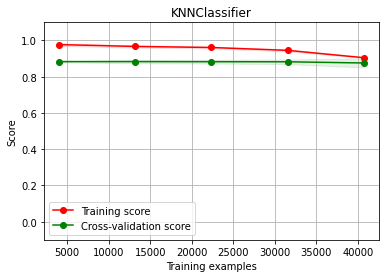

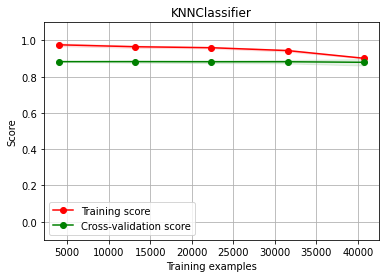

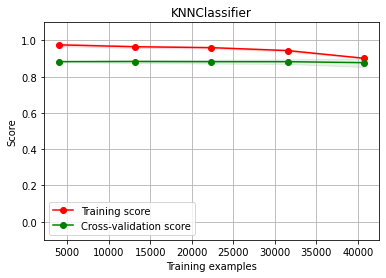

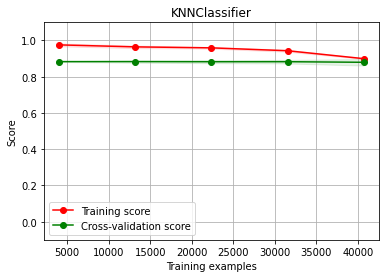

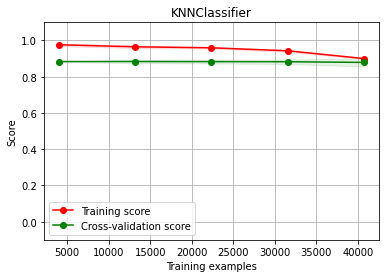

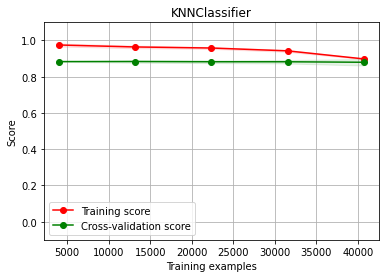

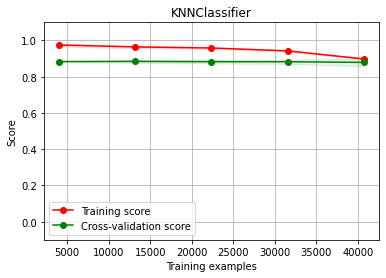

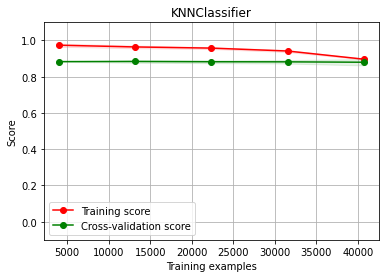

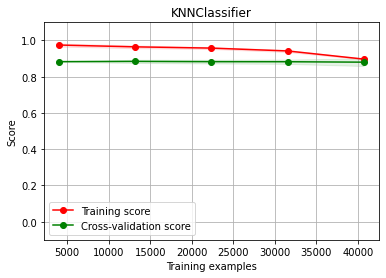

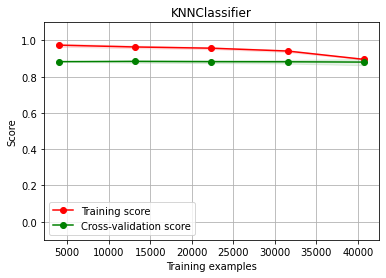

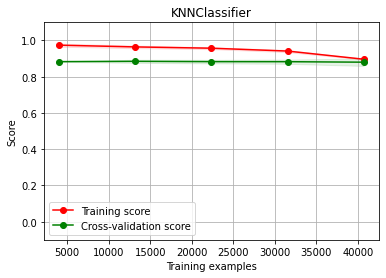

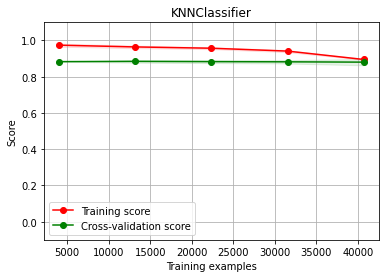

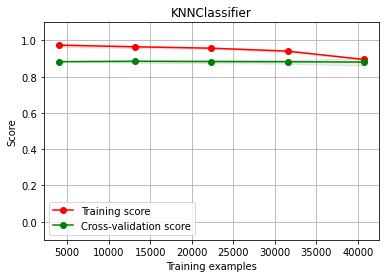

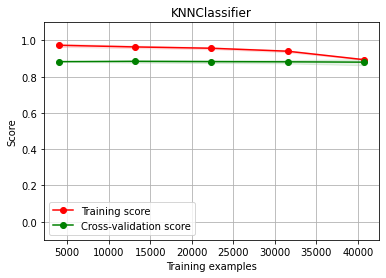

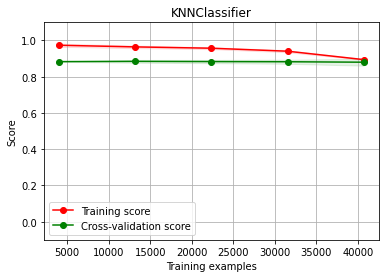

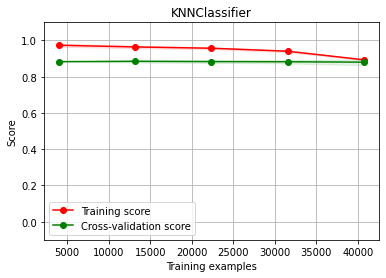

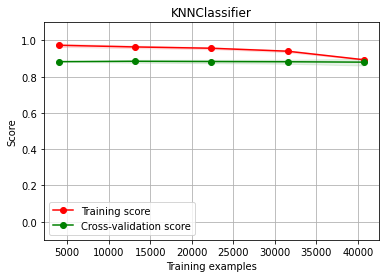

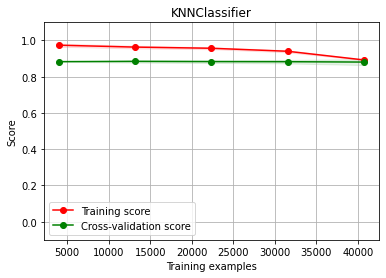

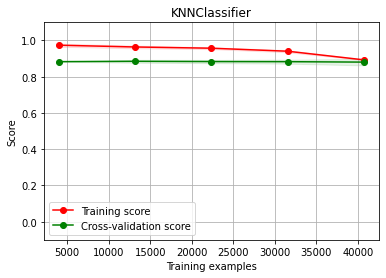

In [52]:
from sklearn.neighbors import KNeighborsClassifier
k_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
accu_KNN=[]
for i in k_list:
  # Fitting K-NN to the Training set
  classifier = KNeighborsClassifier(n_neighbors = i)
  history=classifier.fit(x1_train, y1_train)

  # Predicting the Test set results
  y_pred = classifier.predict(x1_test)

  # 10 fold cross validation
  accuracies = kfold(x1_train, y1_train)

  accu_KNN+=[accuracies.mean()]
  std=accuracies.std()
  report=sk.classification_report(y1_test,y_pred)
  confusionmat(y1_test, y_pred)

  print("KNN with n= ",i)
  print("The Classification report\n",report,end='\n')
  print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
  #after using cross validation with 10 folds
  print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
  print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

  knn_learningcurve(classifier, df_features, df_target)

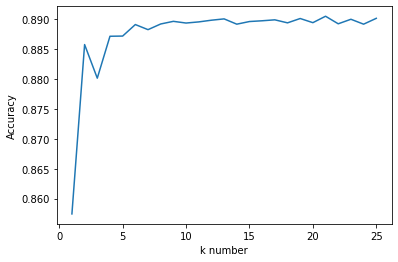

In [53]:
plt.plot(k_list,accu_KNN)
plt.xlabel("k number")
plt.ylabel("Accuracy")
plt.show()

##Experiment with Distance Metric

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[[11681   288]
 [ 1261   334]] 

The accuracy is 0.8858006487761723
KNN with n=  9
The Confusion Matrix
 [[11681   288]
 [ 1261   334]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.21      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58006487761723
The mean of the accuracy scores with using 10 fold-cross validation
 88.96265850214598
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4565458394082361


No handles with labels found to put in legend.


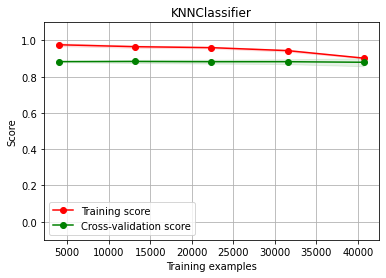

In [27]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="manhattan")
history=classifier.fit(x1_train, y1_train)
# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 10 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[[11653   316]
 [ 1257   338]] 

The accuracy is 0.8840312592155706
KNN with n=  9
The Confusion Matrix
 [[11653   316]
 [ 1257   338]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11969
           1       0.52      0.21      0.30      1595

    accuracy                           0.88     13564
   macro avg       0.71      0.59      0.62     13564
weighted avg       0.86      0.88      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.40312592155706
The mean of the accuracy scores with using 10 fold-cross validation
 88.70035530044757
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.38276785792429996


No handles with labels found to put in legend.


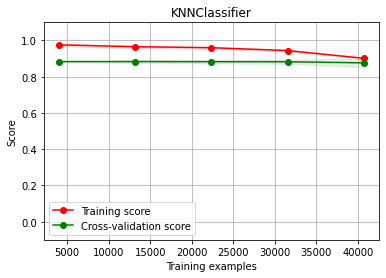

In [28]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="chebyshev")
history=classifier.fit(x1_train, y1_train)
# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 10 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[[11640   329]
 [ 1229   366]] 

The accuracy is 0.8851371276909467
KNN with n=  9
The Confusion Matrix
 [[11640   329]
 [ 1229   366]]
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11969
           1       0.53      0.23      0.32      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.63     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.51371276909467
The mean of the accuracy scores with using 10 fold-cross validation
 88.96579409350451
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3977334212633169


No handles with labels found to put in legend.


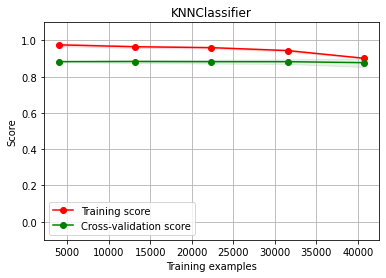

In [32]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="euclidean")
history=classifier.fit(x1_train, y1_train)
# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 10 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

#Final K-NN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[11681   288]
 [ 1261   334]] 

The accuracy is 0.8858006487761723
KNN with n=  9
The Classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.54      0.21      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

The Accuracy score with only 1 Training and Testing Data Set
 88.58006487761723


No handles with labels found to put in legend.


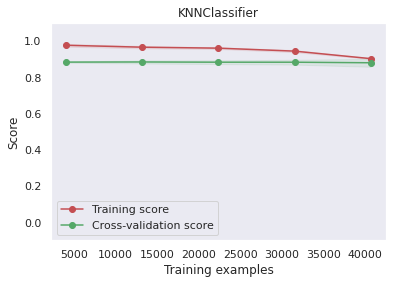

In [41]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="manhattan")
history=classifier.fit(x1_train, y1_train)
# Predicting the Test set results
y_pred = classifier.predict(x1_test)

report=sk.classification_report(y1_test,y_pred)
confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
knn_learningcurve(classifier, df_features, df_target)

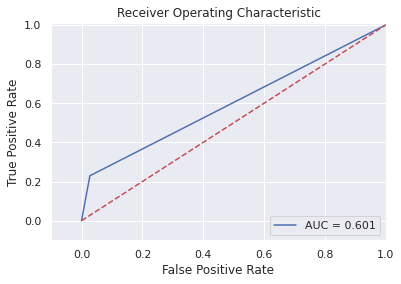

In [39]:
roc_auc(y1_test,y_pred)

#Comparisons

  distance_list  Accuracy
0     euclidean   88.5137
1     manhattan   88.5800
2     chebyshev   88.4031


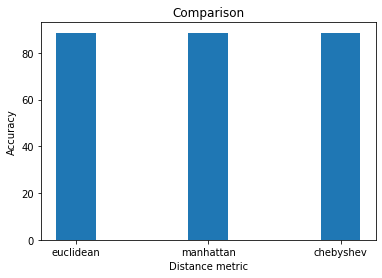

<Figure size 144x144 with 0 Axes>

In [15]:
distance_list=['euclidean','manhattan','chebyshev']
Accuracy_test=[88.5137,88.5800,88.4031]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.xlabel('Distance metric')
plt.ylabel('Accuracy')
plt.title('Comparison')
plt.figure(figsize=(2,2))
plt.show()

   distance_list  Accuracy
0  Neual Network   88.9265
1            KNN   88.5800


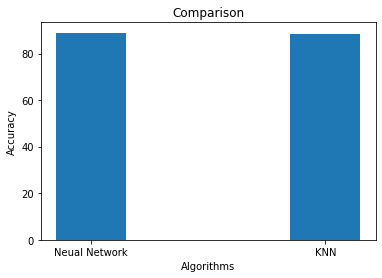

<Figure size 72x72 with 0 Axes>

In [13]:
# knn and nn
distance_list=['Neual Network','KNN']
Accuracy_test=[88.9265,88.5800]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['Algorithm','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison')
plt.figure(figsize=(1,1))
plt.show()

        Algorithms  Accuracy
0          SVM-rbf     88.78
1   Decision Trees     85.29
2         Boosting     89.52
3  Neural Networks     88.93
4    KNN-Manhattan     88.58


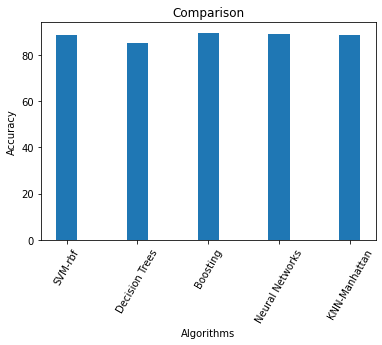

<Figure size 144x144 with 0 Axes>

In [14]:
# comparison between svm  knn nn decision trees ensemble

Algorithms=['SVM-rbf','Decision Trees','Boosting','Neural Networks','KNN-Manhattan']
Accuracy_test=[88.78,85.29,89.52,88.93,88.58]
 
d1=pd.DataFrame(list(zip(Algorithms,Accuracy_test)),columns=['Algorithms','Accuracy'])
print(d1)

# this is for plotting purpose
plt.bar(Algorithms, Accuracy_test, width=0.3)
plt.xlabel('Algorithms')
plt.tick_params(axis='x', rotation=60)
plt.ylabel('Accuracy')
plt.title('Comparison')
plt.figure(figsize=(2,2))
plt.show()